<a href="https://colab.research.google.com/github/Coder5050max/coding/blob/main/Dog_VS_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:48<00:00, 25.0MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.3MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = 'test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [10]:

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(160,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 160)         │         184,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 160)         │             640 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 160)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 31360)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,014,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,301,793 (16.41 MB)

 Trainable params: 4,301,025 (16.41 MB)

 Non-trainable params: 768 (3.00 KB)

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [63]:
model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.8973 - loss: 0.2356 - val_accuracy: 0.8556 - val_loss: 0.3473
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - accuracy: 0.9264 - loss: 0.1766 - val_accuracy: 0.8568 - val_loss: 0.3578
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 83ms/step - accuracy: 0.9463 - loss: 0.1280 - val_accuracy: 0.8818 - val_loss: 0.4113
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 88ms/step - accuracy: 0.9585 - loss: 0.1018 - val_accuracy: 0.9018 - val_loss: 0.3240
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.9613 - loss: 0.0975 - val_accuracy: 0.8710 - val_loss: 0.4196
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.9710 - loss: 0.0744 - val_accuracy: 0.8750 - val_loss: 0.4414
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 83ms/step - accuracy: 0.9727 - loss: 0.0706 - val_accuracy: 0.9098 - val_loss: 0.3092
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - accuracy: 0.9801 - loss: 0.0516 - 

In [64]:
import cv2
import matplotlib.pyplot as plt

In [65]:
test_img = cv2.imread('Cat.jpg')


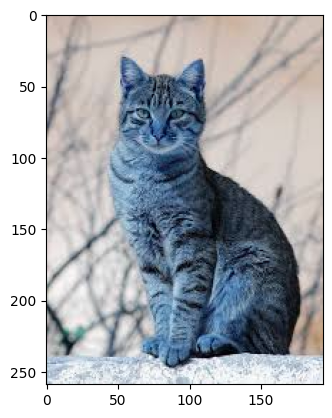

In [66]:
plt.imshow(test_img)

In [67]:
test_img.shape

(259, 194, 3)

In [68]:
test_img = cv2.resize(test_img,(256,256))


In [69]:
test_input = test_img.reshape((1,256,256,3))

In [70]:
# prompt: decode prediction code

import numpy as np

# Assuming 'model' and 'test_input' are defined as in your original code.
prediction = model.predict(test_input)

# The prediction will be a probability between 0 and 1.
# We can interpret this as the probability of the image being a dog.
# A threshold can be applied to classify it as a dog or cat.

threshold = 0.5  # Example threshold
predicted_class = "Dog" if prediction[0][0] > threshold else "Cat"

print(f"Prediction: {prediction[0][0]}")
print(f"Predicted Class: {predicted_class}")

# Alternatively, if your model output is a class index (0 or 1):
# predicted_class = np.argmax(prediction)
# class_labels = ["Cat", "Dog"] # Define class labels
# print(f"Predicted Class: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction: 0.0
Predicted Class: Cat


In [71]:
test_img1 = cv2.imread('Dog.jpg')

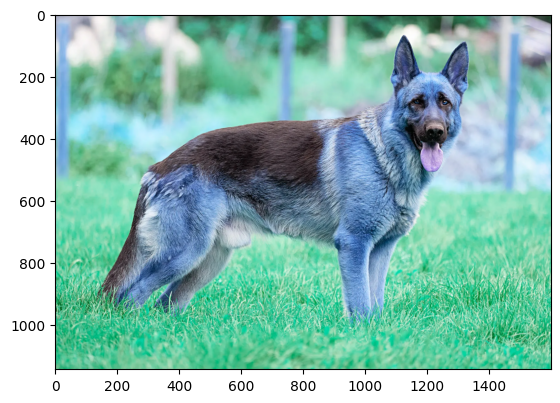

In [72]:
plt.imshow(test_img1)

In [73]:
test_img1.shape

(1144, 1600, 3)

In [74]:
test_img1 = cv2.resize(test_img1,(256,256))

In [75]:
test_input1 = test_img1.reshape((1,256,256,3))

In [76]:

import numpy as np

# Assuming 'model' and 'test_input' are defined as in your original code.
prediction = model.predict(test_input1)

# The prediction will be a probability between 0 and 1.
# We can interpret this as the probability of the image being a dog.
# A threshold can be applied to classify it as a dog or cat.

threshold = 0.5  # Example threshold
predicted_class = "Dog" if prediction[0][0] > threshold else "Cat"

print(f"Prediction: {prediction[0][0]}")
print(f"Predicted Class: {predicted_class}")

# Alternatively, if your model output is a class index (0 or 1):
# predicted_class = np.argmax(prediction)
# class_labels = ["Cat", "Dog"] # Define class labels
# print(f"Predicted Class: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction: 1.0
Predicted Class: Dog
